<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین چهارم</b>
</font>
<br>
<br>
موعد تحویل: ۶ بهمن <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>پیاده‌سازی Crawler (20 نمره)</b>
    </h1>
</font>

<br>

<font face="XB Zar" size=3>
   در این بخش باید یک Crawler برای استخراج اطلاعات تعدادی مقاله از سایت <a href="https://www.semanticscholar.org/">Semantic Scholar</a> پیاده سازی کنید.
   اطلاعات مورد نظر برای استخراج، باید حاوی موارد زیر باشند:
</font>

</div>

<br>

<table dir="ltr" style="width: 100%; border-collapse: collapse;">
  <tr>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">ID</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Title</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Publication Year</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Authors</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Related Topics</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Citation Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">Reference Count</th>
    <th style="padding: 8px; text-align: justify; border: 1px solid black;">References</th>
  </tr>
  <tr>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Title of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Unique ID of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Abstract of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Publication year</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of all authors separated with ","</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Name of all topics separated with ","</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Number of citations of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">Number of references of the paper</td>
    <td style="padding: 8px; text-align: justify; border: 1px solid black;">ID of the first 10 references separated with ","</td>
  </tr>
</table>

<div dir="rtl">

<font face="XB Zar" size=3>
  فرایند استخراج را از ۵ مقاله‌ی اولیه‌ی هر استاد شروع کنید و ۱۰ مرجع اول هر مقاله را به صف مقالات اضافه کنید.
  فرایند استخراج را تا زمانی که اطلاعات ۱۰۰۰ مقاله را داشته باشید ادامه دهید.
  اطلاعات مقالات را در فایل <code dir="ltr">${Professor Name}.json</code> ذخیره کنید.
</font>

</div>

<br>

<div dir="rtl">

<font face="XB Zar" size=3>
  در پیاده سازی Crawler به موارد زیر دقت کنید:
<ul>
<li>در زمان تحویل، کد Crawler شما اجرا خواهد شد و صحت عملکرد آن مورد بررسی قرار می‌گیرد.</li>
<li>حق استفاده از سرویس API سایت Semantic Scholar را ندارید.</li>
<li>بین هر بار درخواست از سایت، یک فاصله‌ی چند ثانیه‌ای بدهید کم‌تر دچار مشکل شوید (انجام این عمل ضروری است).</li>
<li>در صورتی که ‌Crawler شما دچار مشکلی مثل Request Timeout شد، نباید کار خود را متوقف کند و باید روند استخراج را ادامه دهد.</li>
<li>برای استخراج می‌توانید از پکیج‌هایی مثل <a href="https://www.selenium.dev/selenium/docs/api/py/">Selenium</a> و یا <a href="https://github.com/scrapy/scrapy">Scrapy</a>  استفاده کنید. همچنین برای تجزیه‌ی اطلاعات استخراج شده، می‌توانید از پکیج <a href="https://pypi.org/project/beautifulsoup4/">Beautiful Soup</a> استفاده کنید.</li>
</ul>
</font>

</div>

<br>

<div dir="rtl">

<font face="XB Zar" size=3>
  در صورتی که می‌خواهید از Scrapy برای پیاده‌سازی Crawler خود استفاده کنید، می‌توانید کد زیر را کامل کنید:
</font>

</div>

In [ ]:
import json
import re
import traceback

from bs4 import BeautifulSoup
from urllib.parse import urljoin
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep
from json import dump


# This code is written by the help of Amir Mohammad Fakhimi and Taha Akbari
class PaperCrawler:

    def initialize_driver(self):
        driver = webdriver.Chrome(executable_path='E:/programs/chromedriver.exe')
        driver.maximize_window()
        return driver

    def __init__(self):
        self.driver = self.initialize_driver()

    def get_abstract(self):
        try:
            button = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.XPATH,
                                                                                      '//button[@aria-label="Expand truncated text" and @data-test-id="text-truncator-toggle"]')))
            actions = ActionChains(self.driver)
            actions.move_to_element(button).perform()
            button.click()
        except:
            pass
        return BeautifulSoup(self.driver.page_source, 'html.parser').find('meta', attrs={'name': 'description'})[
            'content']

    def get_references(self):
        base_url = 'https://www.semanticscholar.org/'
        WebDriverWait(self.driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@id="cited-papers"]')))
        return [urljoin(base_url, paper.get('href')) for paper in
                BeautifulSoup(self.driver.page_source, 'html.parser').find('div', {'id': 'cited-papers'}).find_all('a',
                                                                                                                   attrs={
                                                                                                                       'data-heap-id': 'citation_title'})]

    def get_reference_titles(self):
        WebDriverWait(self.driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@id="cited-papers"]')))
        return [paper.find('h3').text for paper in
                BeautifulSoup(self.driver.page_source, 'html.parser').find('div', {'id': 'cited-papers'}).find_all('a',
                                                                                                                   attrs={
                                                                                                                       'data-heap-id': 'citation_title'})]

    def get_authors(self):
        try:
            button = WebDriverWait(self.driver, 10).until(EC.element_to_be_clickable((By.XPATH,
                                                                                      '//button[@data-test-id="author-list-expand" and @aria-expanded="false"]')))
            actions = ActionChains(self.driver)
            actions.move_to_element(button).perform()
            button.click()
        except:
            pass
        results = BeautifulSoup(self.driver.page_source, 'html.parser').find_all('span',
                                                                                 attrs={
                                                                                     'data-heap-id': 'heap_author_list_item',
                                                                                     'data-test-id': 'author-list'})
        return [result.find('a').find('span').find('span').text for result in results if result.find('a')]

    def get_related_topics(self):
        WebDriverWait(self.driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//div[@data-test-id="related-papers-list"]')))
        return ', '.join([t.find(string=True, recursive=False) for t in
                          BeautifulSoup(self.driver.page_source, 'html.parser').find_all('a', attrs={
                              'data-test-id': re.compile(r'topic-\d+')})])

    def scroll_down(self, url):
        self.driver.get(url)
        last_height = self.driver.execute_script("return document.body.scrollHeight")
        while True:
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            sleep(1)
            new_height = self.driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

    def get_id(self):
        WebDriverWait(self.driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//li[@data-test-id="corpus-id"]')))
        return \
            BeautifulSoup(self.driver.page_source, 'html.parser').find('li',
                                                                       attrs={'data-test-id': 'corpus-id'}).text.split(
                ': ')[1]

    def get_title(self):
        WebDriverWait(self.driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//h1[@data-test-id="paper-detail-title"]')))
        return BeautifulSoup(self.driver.page_source, 'html.parser').find('h1',
                                                                          attrs={
                                                                              'data-test-id': 'paper-detail-title'}).text

    def get_publication_year(self):
        WebDriverWait(self.driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//span[@data-test-id="paper-year"]')))
        return \
        BeautifulSoup(self.driver.page_source, 'html.parser').find('span', attrs={'data-test-id': 'paper-year'}).find(
            'span').find('span').text.split(' ')[-1]

    def return_or_none(self, function, val):
        try:
            return function()
        except Exception as e:
            return val

    def get_citation_count(self):
        WebDriverWait(self.driver, 10).until(
            EC.presence_of_element_located((By.XPATH, '//a[@data-heap-nav="citing-papers"]')))
        return \
            BeautifulSoup(self.driver.page_source, 'html.parser').find('a',
                                                                       attrs={'data-heap-nav': 'citing-papers'}).find(
                'span').text.split(' ')[0]

    def get_references_count(self):
        try:
            return int(
                self.driver.find_element(By.CSS_SELECTOR, 'a[data-heap-nav="cited-papers"]').text.split()[
                    0].strip().replace(
                    ',',
                    ''))
        except:
            return None

    def extract(self):
        return {
            'id': self.return_or_none(self.get_id, ''),
            'title': self.return_or_none(self.get_title, ''),
            'abstract': self.return_or_none(self.get_abstract, ''),
            'publication year': self.return_or_none(self.get_publication_year, ''),
            'authors': self.return_or_none(self.get_authors, []),
            'related topics': self.return_or_none(self.get_related_topics, ''),
            'citation count': self.return_or_none(self.get_citation_count, ''),
            'reference count': self.return_or_none(self.get_references_count, ''),
            'references': self.return_or_none(self.get_reference_titles, '')
        }

    def start_crawling(self):
        professors = ['Soleymani']
        with open('crawled_paper.txt', 'r') as f:
            total_papers = json.loads(f.read())

        for professor in professors:
            queue = []
            with open(f"{professor}.txt", 'r') as f:
                queue += [link.strip() for link in f.readlines()]
            papers = []
            for k in range(200):
                print(k)
                sleep(0.5)
                try:
                    self.scroll_down(queue[0])
                    references = self.return_or_none(self.get_references, [])
                    queue += references
                    papers.append(self.extract())
                    total_papers.append(papers[-1])
                    queue = queue[1:]
                except Exception as e:
                    traceback.format_exc()
                dump(papers, open(f'crawled_paper_{professor}.txt', 'w'))
                dump(total_papers, open(f'crawled_paper.txt', 'w'))
                dump(queue, open('last_queue.txt', 'w'))


crawler = PaperCrawler()
crawler.start_crawling()


<div dir="rtl">

<font face="XB Zar" size=3>
  حال برای اجرای این Crawler، کافی است آن را درون فایل <code>scholar.py</code> قرار دهیم و سپس دستور زیر را اجرا کنیم:
</font>

</div>

In [ ]:
pip3 install scrapy
scrapy runspider scholar.py

<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>LSI (20 نمره)</b>
    </h1>
</font>
</div>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

<div style="direction: rtl">
در گام نخست داده‌های استخراج شده را به شکل ماتریس term-document تشکیل دهید.
</div>

In [67]:
def load_sample_data():
    """
    Returns:
    Term-document matrix
    """
    with open('crawled_paper.txt', 'r') as f:
      data = json.loads(f.read())
    data_frame = pd.DataFrame(data)
    data_frame.to_csv('papers.csv')
    abstracts = data_frame['abstract'].tolist()
    vectorizer = CountVectorizer()
    term_document_matrix = vectorizer.fit_transform(abstracts)
    term_document_df = pd.DataFrame(term_document_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    print(term_document_df[:10])
    term_document_df.to_csv('term_document_matrix.csv', index=False)
    return term_document_df

In [68]:
term_document_matrix = load_sample_data()

   00  000  001  01  0125  0162  02  03  04  05  069  075  077  08  092  10  100  1000  102  1038  105  1056  1062  109  10k  11  110  1109  1117  115  117  1176  118  1185  12  120  121  125  126  128  129  13  130  134  14  1406946  1407  1419  15  150  152  154  159  16  160  165  167  17  170  173  174  179  17m  18  181  188  19  1960s  1983  1985  1988  1989  1990  1992  1994  1996  1997  1998  1999  1c  1m  1st  20  200  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  2018a  2019  204  209  20newsgroups  21  21000  211  214  2151  22  2200  223  224  23  230  233  237  238  24  240  243  244  245  25  250  256  257  25k  26  260  27  28  29  294002  2a  2d  2i  2mrnas  2pc  2pn  2x10  30  300  30000  305  308848  30k  31  315  32  33  330  33258  335  34  343  347  35  350  3500  36  362  365  366  37  370  38  380  380k  39  399  3d  3k4  3t3  3x10  3x3  3β  40  400  4031  40s  41  42  425  43  431542  438  44  \

<div style="direction: rtl">
در گام بعد، روش LSI را روی این ماتریس ساخته شده اجرا کنید تا علاوه بر به دست آوردن component های U، S و Vt که از SVD به دست می‌آیند، خود ماتریس LSI هم به دست آید.
</div>

In [69]:
from sklearn.decomposition import TruncatedSVD

def perform_lsi(term_document_matrix, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    lsi_matrix = svd.fit_transform(term_document_matrix)

    u_matrix = svd.transform(term_document_matrix)
    s_matrix = svd.singular_values_
    vt_matrix = svd.components_

    return {
        'lsi_matrix': lsi_matrix,
        'u_matrix': u_matrix,
        's_matrix': s_matrix,
        'vt_matrix': vt_matrix
    }



In [70]:
result = perform_lsi(term_document_matrix)
lsi_matrix = result['lsi_matrix']
u_matrix = result['u_matrix']
s_matrix = result['s_matrix']
vt_matrix = result['vt_matrix']


<div style="direction: rtl">
حال از روی ماتریس LSI به دست آمده، میزان شباهت document های مختلف را به دست آورید در فضای latent space.
</div>

In [71]:
def calculate_document_similarity(lsi_matrix):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    Returns:
    Document similarity matrix
    """
    similarity_matrix = cosine_similarity(lsi_matrix, lsi_matrix)
    return similarity_matrix

In [72]:
document_similarity = calculate_document_similarity(lsi_matrix)
print(document_similarity)

[[1.         0.         0.99910475 ... 0.54889041 0.94782782 0.86279362]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.99910475 0.         1.         ... 0.58376132 0.96046531 0.88340864]
 ...
 [0.54889041 0.         0.58376132 ... 1.         0.78672227 0.89617078]
 [0.94782782 0.         0.96046531 ... 0.78672227 1.         0.97894241]
 [0.86279362 0.         0.88340864 ... 0.89617078 0.97894241 1.        ]]


<div style="direction: rtl">
حال document های خود را در فضای Latent Space ساخته شده، نمایش دهید و document های از یک فیلد را با رنگ یکسان نمایش دهید و بررسی کنید آیا آنها نزدیک به یکدیگر قرار میگیرند؟  
</div>

<div style="direction: rtl">
همانطور که از روی نمودار پیداست، بعضی از داده‌هایی که به هم نزدیک تر هستند، رنگ‌هایشان هم به هم نزدیک تر است.
</div>

<div style="direction: rtl">
برای هر مقاله، اولین فیلد related topics آن را به عنوان فیلد آن در نظر بگیرید
</div>

In [73]:
def visualize_documents(lsi_matrix, labels):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    labels: List of document labels
    """
    data_frame = pd.DataFrame(lsi_matrix, columns=['Dimension 1', 'Dimension 2'])
    data_frame['Label'] = labels
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=data_frame, palette='viridis', legend='full')
    plt.title('Visualization of Documents in Latent Space')
    plt.show()

241


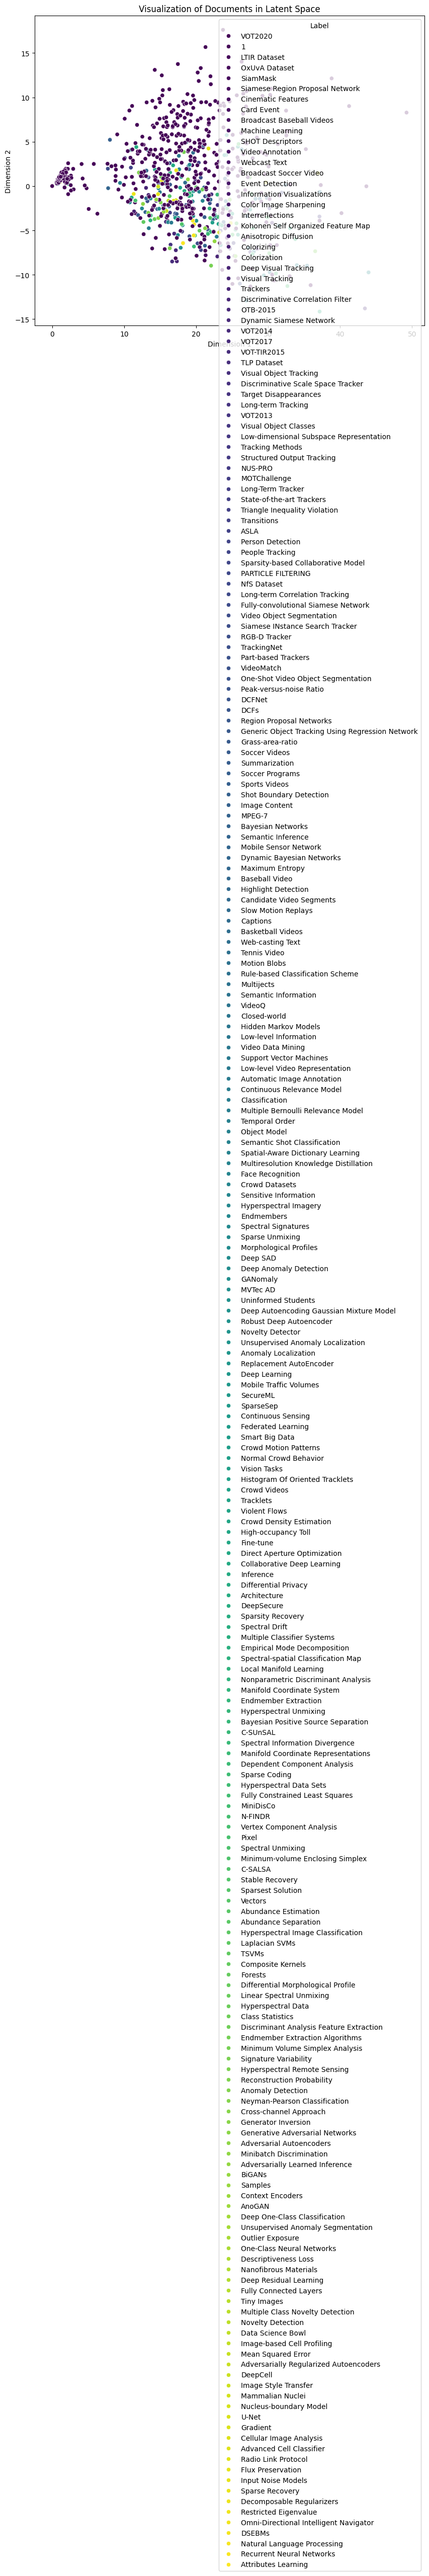

In [74]:
with open('crawled_paper.txt', 'r') as f:
  data = json.loads(f.read())
data_frame = pd.DataFrame(data)
labels = []
for x in data_frame['related topics'].tolist():
    if len(x.strip()) > 0:
        labels.append(x.strip().split(',')[0])
    else:
        labels.append(1)
print(len(set(labels)))
visualize_documents(lsi_matrix, labels)

<div style="direction: rtl">
در گام نهایی این بخش، روی داده‌های کاهش ابعاد شده که رسم هم کردید، الگوریتم K-Means Clustering را اجرا کنید و metric های ARI، AMI و Silhouette را برای خروجی این خوشه‌بندی به دست آورید. تعداد خوشه‌ها را به تعداد دسته‌بندی document ها در نظر بگیرید.
</div>

In [78]:
def perform_kmeans_clustering(lsi_matrix, num_clusters):
    """
    Args:
    lsi_matrix: Reduced-dimensional representation
    num_clusters: Number of clusters
    Returns:
    Cluster labels
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(lsi_matrix)

    return cluster_labels

def calculate_clustering_metrics(labels_true, labels_pred):
    """
    Args:
    labels_true: True cluster labels
    labels_pred: Predicted cluster labels
    Returns:
    Dictionary containing clustering metrics
    """

    ari = adjusted_rand_score(labels_true, labels_pred)
    ami = adjusted_mutual_info_score(labels_true, labels_pred)
    silhouette = silhouette_score(lsi_matrix, labels_pred)

    metrics = {
        'Adjusted Rand Index (ARI)': ari,
        'Adjusted Mutual Information (AMI)': ami,
        'Silhouette Score': silhouette
    }

    return metrics

In [79]:
num_clusters = len(set(labels))
cluster_labels = perform_kmeans_clustering(lsi_matrix, num_clusters)

In [80]:
clustering_metrics = calculate_clustering_metrics(labels, cluster_labels)
print(clustering_metrics)

{'Adjusted Rand Index (ARI)': 0.004537219928907732, 'Adjusted Mutual Information (AMI)': 0.08734336827387687, 'Silhouette Score': 0.4902476883296722}


<div dir="rtl">

<font face="XB Zar" size=4>
    <h1>
    <b>شبکه‌های عصبی (45 نمره)</b>
    </h1>
</font>
</div>

<div align="center">
    <h1>Advanced Disaster Event Predictor Through The Use of Tweets</h3>
</div>


## Overview:

Twitter has become an important source of real-time information during disasters. However, it can be difficult to distinguish between tweets that are reporting real disasters and those that are using disaster-related language metaphorically. This project aims to build a machine learning model that can accurately predict which tweets are about real disasters.

The project will use a dataset of 10,000 hand-classified tweets to train and evaluate the model. The model will be trained to extract features from the tweets that are relevant to disaster prediction, such as the presence of disaster-related keywords and phrases, the sentiment of the tweet, and the user's location.

## Goal

- Develop an accurate classifier.


## Steps

- **Data Preparation:** Assess the quality of the data, handle missing values and outliers, and clean the data.
- **Exploratory Data Analysis:** Inspect the data to gain insights, explore the features, and extract the most useful and representative features.

- **Problem Definition and Evaluation:** Formally define the type of task, metrics, and evaluation methods.
- **Model Selection and Training:** Explore both traditional machine learning and deep learning algorithms to perform the task, and train the models.
- **Model Evaluation and Selection:** Evaluate the performance of the trained models on the test data.

# Download Data

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=15R-o6L6gi3OZs8b97k_FTxliHCF5X1k5'

output = 'dataset.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15R-o6L6gi3OZs8b97k_FTxliHCF5X1k5
To: /content/dataset.zip
100%|██████████| 598k/598k [00:00<00:00, 55.3MB/s]


'dataset.zip'

In [ ]:
! unzip -q dataset.zip

# Import

In [ ]:
import os
import random
import re
import string
import sys
import warnings
from collections import defaultdict
from time import time

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import torch
import torch.nn
import transformers
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)
from torch import nn
from torch.optim import AdamW
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
from transformers import AdamW, BertModel, BertTokenizer

from wordcloud import STOPWORDS

In [ ]:
%matplotlib inline

SEED = 42
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
device = torch.device('cuda')
device

device(type='cuda')

# 1. Data

## 1.1. Features

The dataset includes the following features for each tweet:

- id: A unique identifier for the tweet.
- text: The text of the tweet.
- location: The location where the tweet was sent from.
- keyword: A particular keyword from the tweet (may be blank).
- target: Whether the tweet is about a real disaster (1) or not (0).

In [ ]:
df_train = pd.read_csv('./train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('./test.csv', dtype={'id': np.int16, 'target': np.int8})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 5)
Test Set Memory Usage = 0.08 MB


In [ ]:
df_test.target.value_counts()

0    1861
1    1402
Name: target, dtype: int64

In [ ]:
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

## 1.2. Data Quality Assessment

### 1.2.1. Missing Values:

The training and test sets have identical missing value ratios for the `keyword` and `location` features, with 0.8% and 33% of values missing, respectively. This suggests that the missing values are likely due to random sampling, rather than any systematic bias. Therefore, the missing values in these features are **imputed** with the values `no_keyword` and `no_location`, respectively.

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int16 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   target    3263 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 86.2+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB


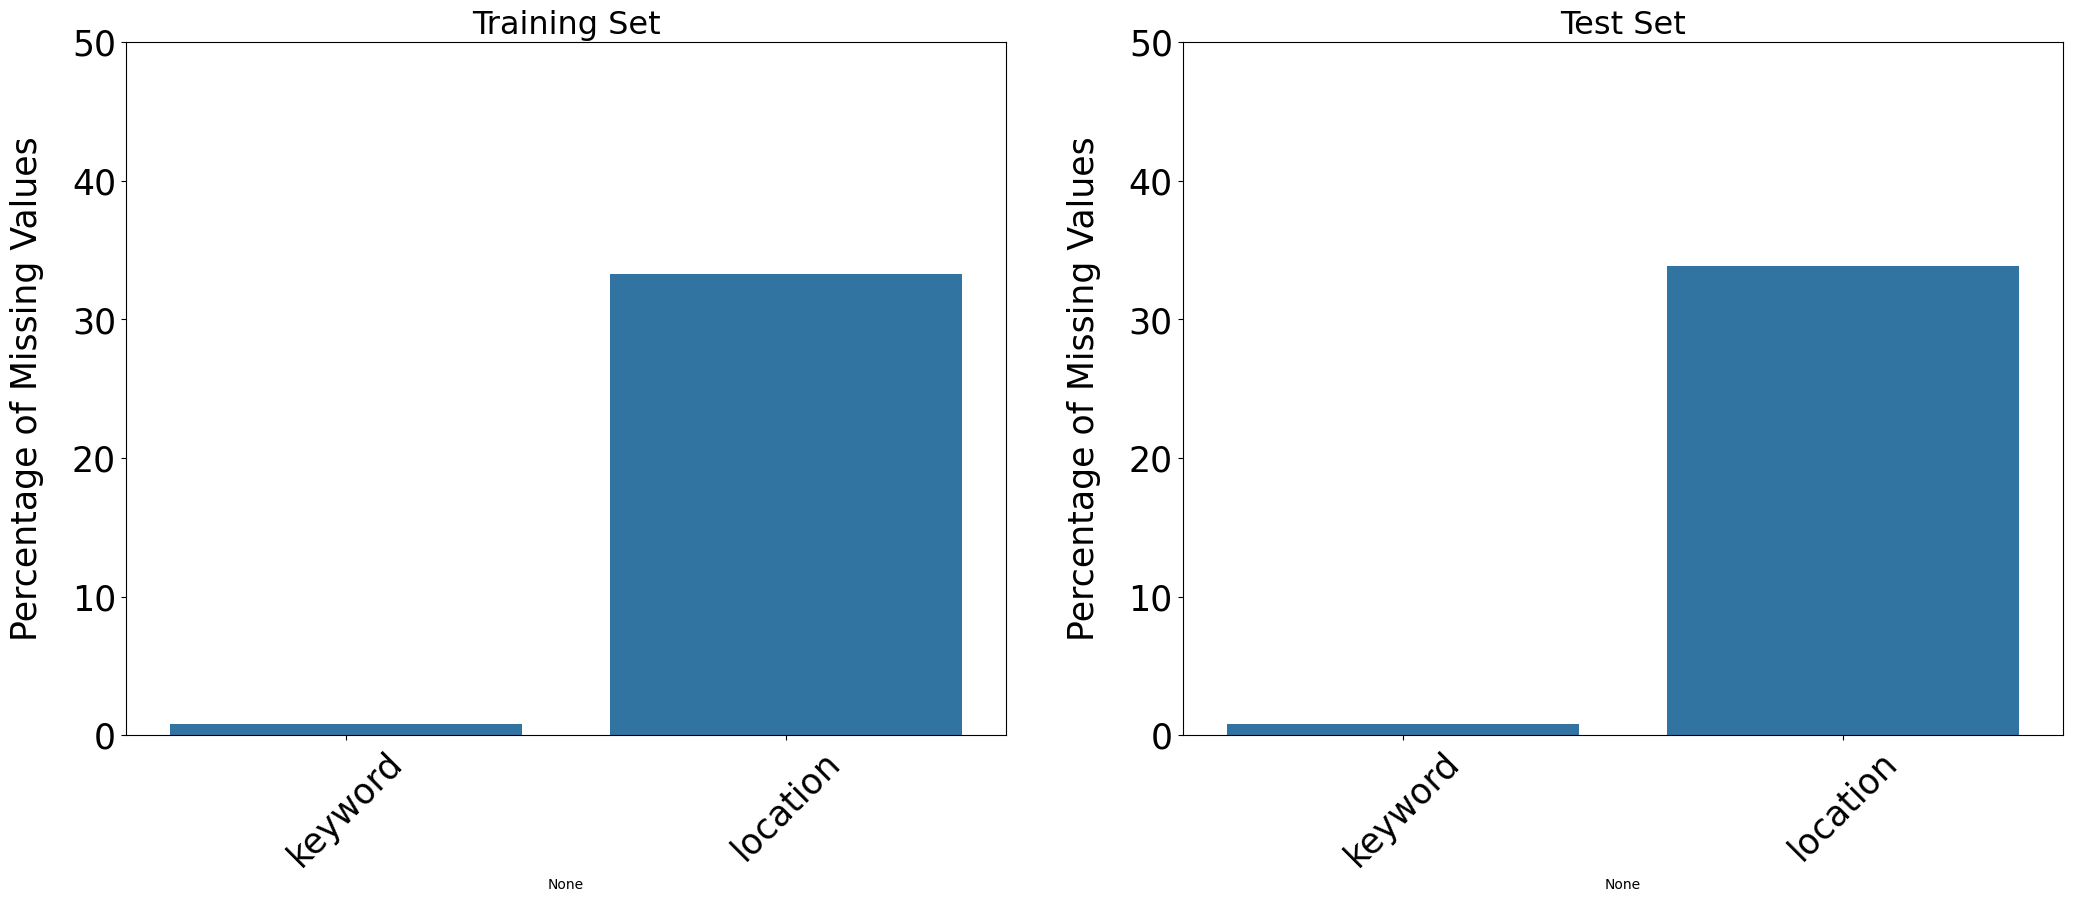

In [ ]:
# Define missing columns
missing_cols = ['keyword', 'location']

# Calculate the percentage of null values for test and train sets
null_percentages = {}
for df, label in [(df_train, 'Training Set'), (df_test, 'Test Set')]:
    null_percentages[label] = df[missing_cols].isnull().mean() * 100

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(25, 9))

for i, (label, percentages) in enumerate(null_percentages.items()):
    sns.barplot(x=percentages.index, y=percentages.values, ax=axes[i])
    axes[i].set_ylabel('Percentage of Missing Values', size=25, labelpad=20)
    axes[i].tick_params(axis='x', labelsize=25, rotation=45)  # Rotate x-axis labels
    axes[i].tick_params(axis='y', labelsize=25)
    axes[i].set_title(label, fontsize=23)
    axes[i].set_yticks([0, 10, 20, 30, 40, 50])  # Set the same yticks for both plots

plt.show()

Both training and test set have same ratio of missing values in keyword and location.

0.8% of keyword is missing in both training and test set
33% of location is missing in both training and test set
Since missing value ratios between training and test set are too close, they are most probably taken from the same sample.

### 1.2.2 Impute Missing Fields

In [ ]:
# Exercise 1 - impute nullable cols

# TODO
for col in missing_cols:
    df_train[col].fillna(f'no_{col}', inplace=True)
    df_test[col].fillna(f'no_{col}', inplace=True)

print("Missing Values in Training Set:")
print(df_train.isnull().sum())

print("\nMissing Values in Test Set:")
print(df_test.isnull().sum())


Missing Values in Training Set:
id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Missing Values in Test Set:
id          0
keyword     0
location    0
text        0
target      0
dtype: int64


 Missing values in those features are filled with no_keyword and no_location respectively.

## 1.3. Data Exploration

To select or design an appropriate algorithm for achieving our goals, given the data we have, we should first understand the characteristics of the data.

### 1.3.1. Target Distribution

The class distribution for the target variable is 57% for 0 (Not Disaster) and 43% for 1 (Disaster). The classes are almost equally balanced, so stratification by target is not necessary during cross-validation.

In [ ]:
def plot_target_distribution(df):
    fig, axes = plt.subplots(ncols=1, figsize=(7, 5), dpi=100)
    plt.tight_layout()

    sns.countplot(x=df['target'], hue=df['target'], ax=axes)

    axes.set_ylabel('')
    axes.set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
    ''
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')

    axes.set_title('Target Count in Training Set', fontsize=13)

    plt.show()

plot_target_distribution(df_train)

### 1.3.2. Feature Reduction: `location`

The `location` feature is not automatically generated, but is instead a user input. This makes it a very noisy feature, with too many unique values to be useful as a feature.


### 1.3.3. Feature Visualization `keyword`

The `keyword` feature, on the other hand, has more signal, as some keywords are only used in specific contexts. Keywords also have very different tweet counts and target means, making them a useful feature by itself or as a word added to the text. Additionally, every single keyword in the training set also exists in the test set, which suggests that the two sets were drawn from the same sample. If this is the case, then it is also possible to use target encoding on the `keyword` feature.

In [ ]:
def print_unique_values(df, column_name, data_label):
    unique_values = df[column_name].nunique()
    print(f'Number of unique values in {column_name} = {unique_values} ({data_label})')

# Define the columns and labels
data_labels = ['Training', 'Test']

# Loop through columns and data labels to print unique values
for df, label in zip([df_train, df_test], data_labels):
    print_unique_values(df, 'keyword', label)

In [ ]:
# Calculate target mean by keyword
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

# Create a figure
fig, ax = plt.subplots(figsize=(8, 72), dpi=100)

# Sort values by target mean and plot
sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'], ax=ax)

# Set labels and legend
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc=1)

# Set title
plt.title('Target Distribution in Keywords')

# Show plot
plt.show()

# Drop the temporary 'target_mean' column
df_train.drop(columns=['target_mean'], inplace=True)


### 1.3.4. Linguistic Features of Disaster Tweets

Distributions of linguistic features in classes and datasets can be helpful to identify disaster tweets. For example, disaster tweets are often written in a more formal way with longer words compared to non-disaster tweets, because many disaster tweets come from news agencies. Non-disaster tweets, on the other hand, are often more informal and may contain more typos, because they are often written by individual users.

- `word_count`: number of words in text.
- `unique_word_count`: number of unique words in text.
- `stop_word_count`: number of stop words in text.
- `url_count`: number of urls in text.
- `mean_word_length`: average character count in words.
- `char_count`: number of characters in text.
- `punctuation_count`: number of punctuations in text.
- `hashtag_count`: number of hashtags (#) in text.
- `mention_count`: number of mentions (@) in text.

In [ ]:
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def count_words(text):
    return len(str(text).split())

def count_unique_words(text):
    return len(set(str(text).split()))

def count_stop_words(text):
    stop_words = set(stopwords.words('english'))
    return len([word for word in str(text).lower().split() if word in stop_words])

def count_urls(text):
    return len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', str(text)))

def mean_word_length(text):
    words = str(text).split()
    return np.mean([len(word) for word in words]) if len(words) > 0 else 0

def count_characters(text):
    return len(str(text))

def count_punctuation(text):
    return len([char for char in str(text) if char in string.punctuation])

def count_hashtags(text):
    return len(re.findall(r'#(\w+)', str(text)))

def count_mentions(text):
    return len(re.findall(r'@(\w+)', str(text)))

def apply_text_features(df):
    df['word_count'] = df['text'].apply(count_words)
    df['unique_word_count'] = df['text'].apply(count_unique_words)
    df['stop_word_count'] = df['text'].apply(count_stop_words)
    df['url_count'] = df['text'].apply(count_urls)
    df['mean_word_length'] = df['text'].apply(mean_word_length)
    df['char_count'] = df['text'].apply(count_characters)
    df['punctuation_count'] = df['text'].apply(count_punctuation)
    df['hashtag_count'] = df['text'].apply(count_hashtags)
    df['mention_count'] = df['text'].apply(count_mentions)

apply_text_features(df_train)
apply_text_features(df_test)


The distributions of all meta features in the training and test sets are very similar, which confirms that they were drawn from the same sample.

While all meta features contain information about the target variable, some, such as `url_count`, `hashtag_count`, and `mention_count`, are not as informative as others. In contrast, `word_count`, `unique_word_count`, `stop_word_count`, `mean_word_length`, `char_count`, and `punctuation_count` have very different distributions for disaster and non-disaster tweets, suggesting that they may be useful features for machine learning models.

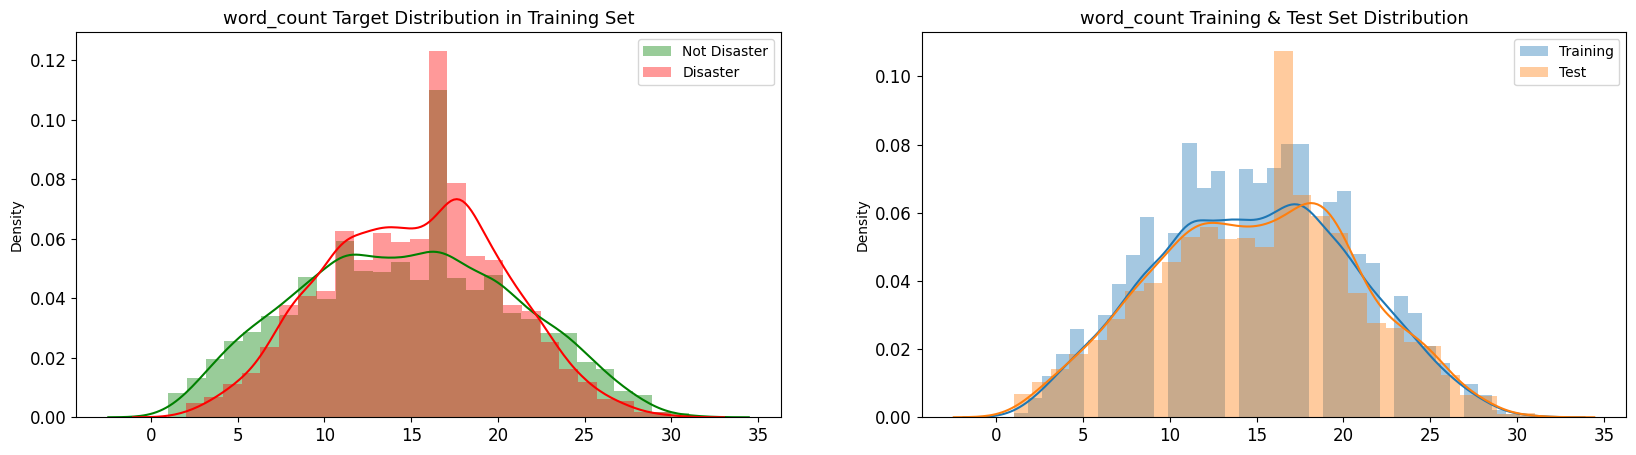

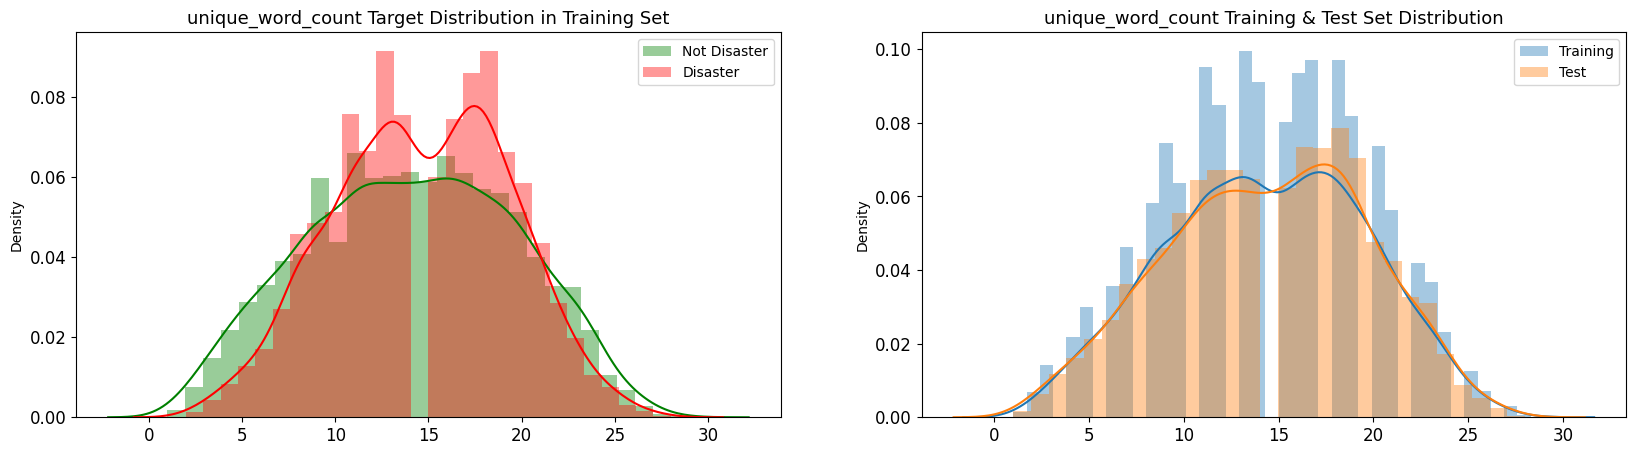

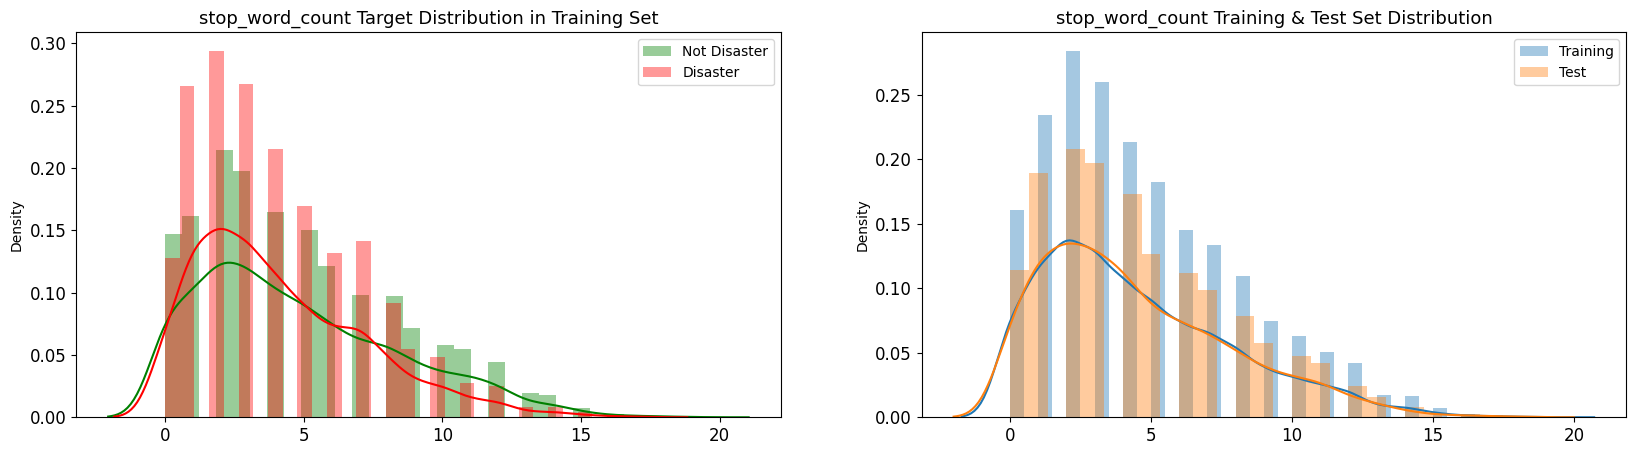

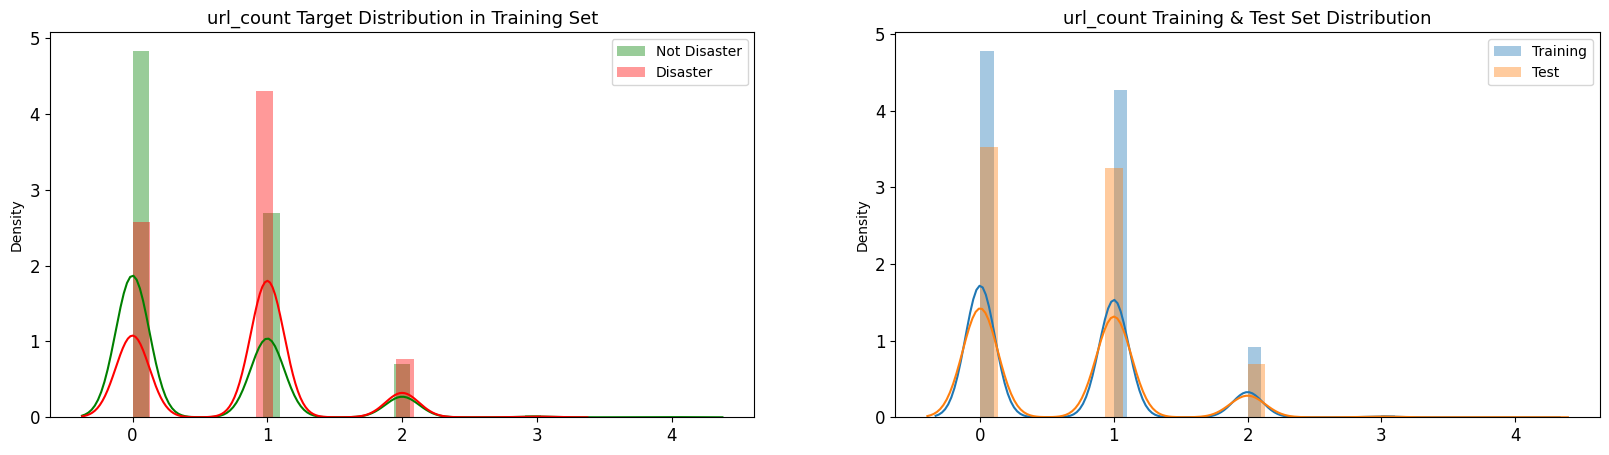

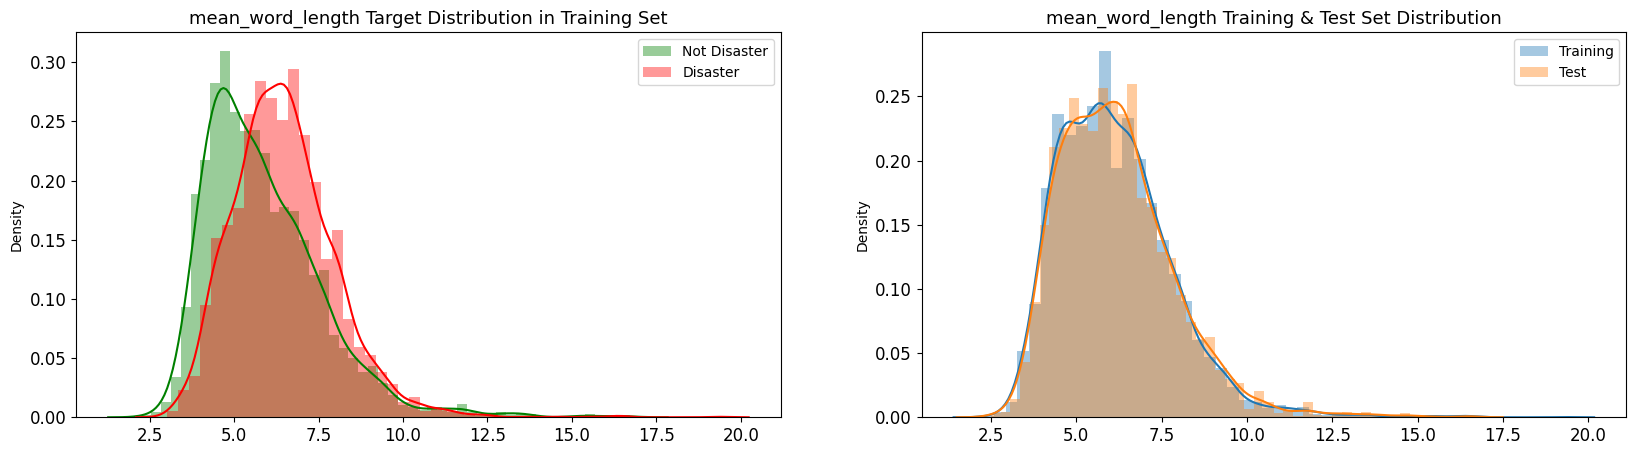

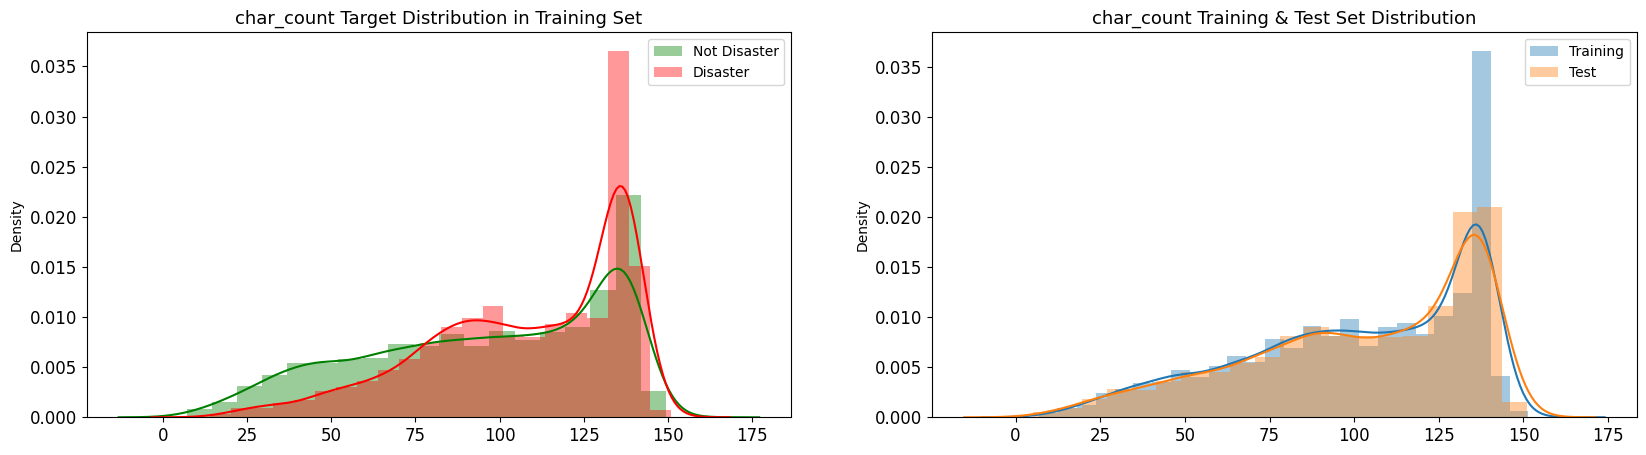

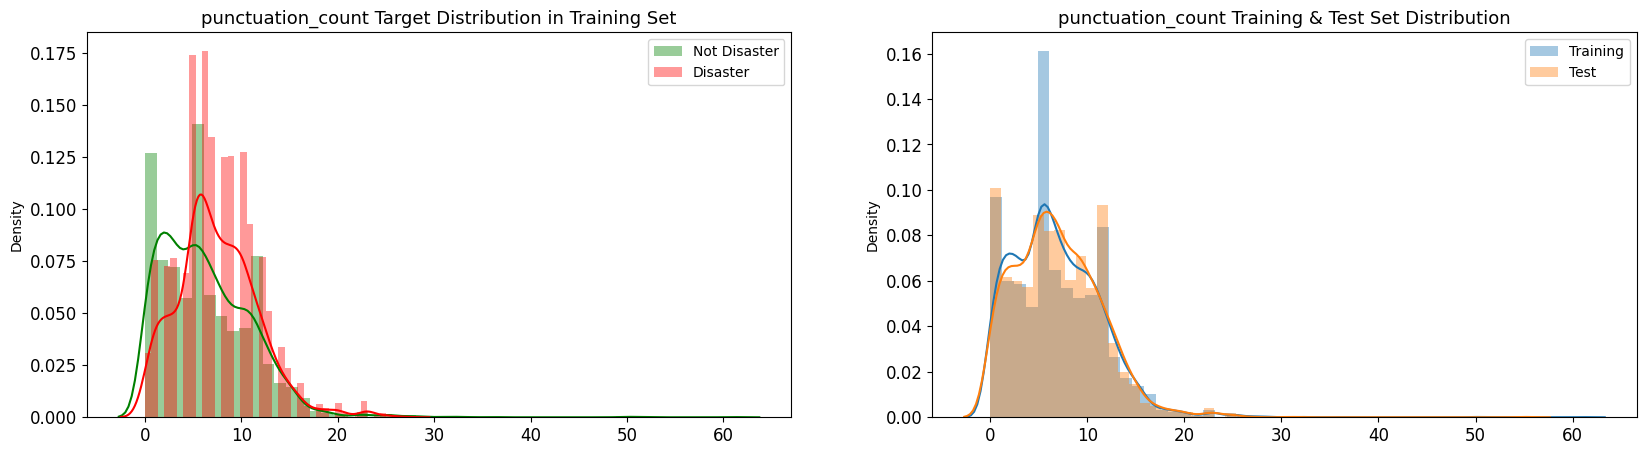

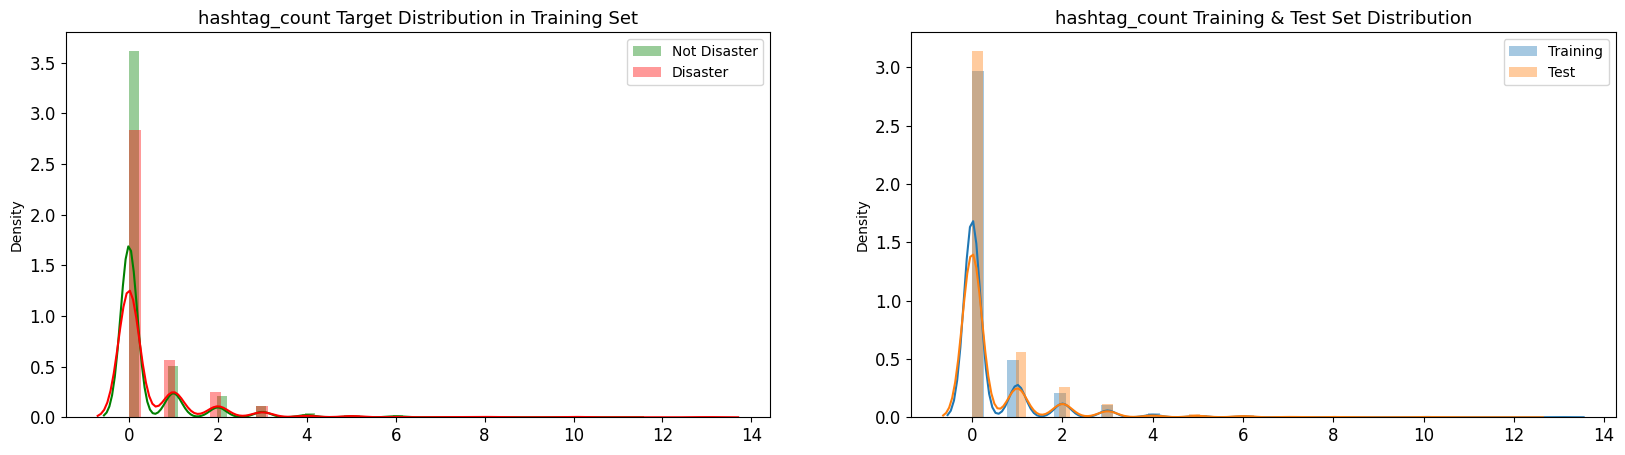

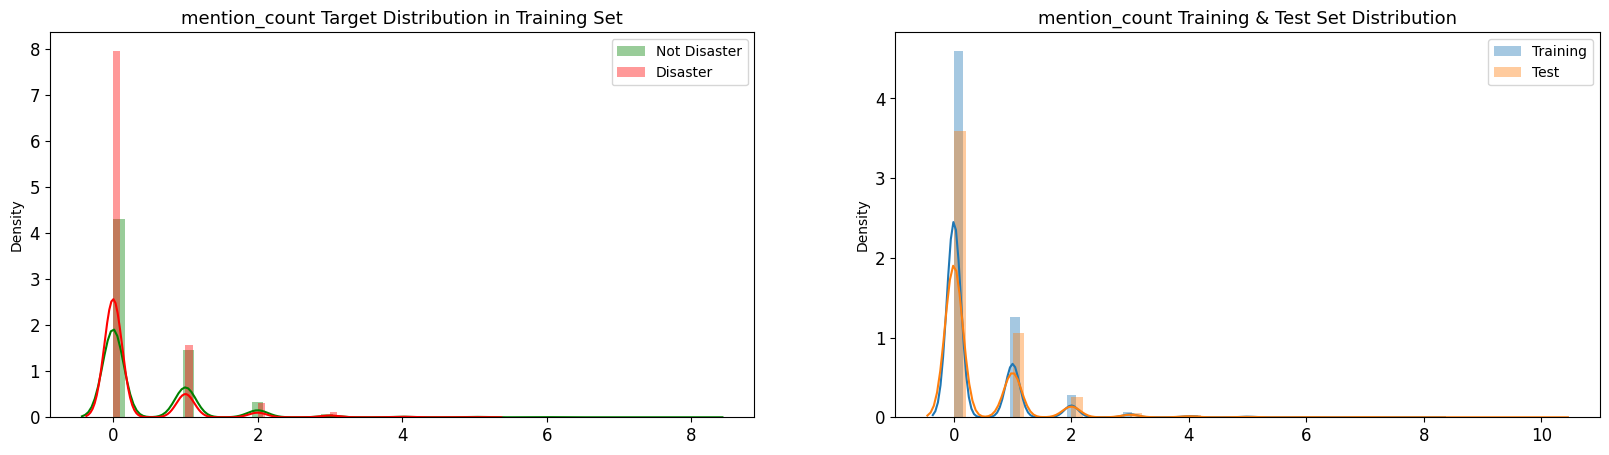

In [ ]:
def plot_metafeature_distribution(df, feature, disaster_tweets):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 5), dpi=100)

    sns.distplot(df.loc[~disaster_tweets][feature], label='Not Disaster', ax=axes[0], color='green')
    sns.distplot(df.loc[disaster_tweets][feature], label='Disaster', ax=axes[0], color='red')

    sns.distplot(df[feature], label='Training', ax=axes[1])
    sns.distplot(df_test[feature], label='Test', ax=axes[1])

    for j in range(2):
        axes[j].set_xlabel('')
        axes[j].tick_params(axis='x', labelsize=12)
        axes[j].tick_params(axis='y', labelsize=12)
        axes[j].legend()

    axes[0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']

DISASTER_TWEETS = df_train['target'] == 1

for feature in METAFEATURES:
    plot_metafeature_distribution(df_train, feature, DISASTER_TWEETS)

plt.show()


### 1.3.5. Content Bigrams & Trigrams


In [ ]:
def generate_ngrams(text, n_gram=1):
    tokens = [token for token in text.lower().split(' ') if token and token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

def count_ngrams(df, n_gram=1):
    disaster_ngrams = defaultdict(int)
    nondisaster_ngrams = defaultdict(int)

    for tweet in df[DISASTER_TWEETS]['text']:
        for word in generate_ngrams(tweet, n_gram=n_gram):
            disaster_ngrams[word] += 1

    for tweet in df[~DISASTER_TWEETS]['text']:
        for word in generate_ngrams(tweet, n_gram=n_gram):
            nondisaster_ngrams[word] += 1

    df_disaster_ngrams = pd.DataFrame(sorted(disaster_ngrams.items(), key=lambda x: x[1], reverse=True))
    df_nondisaster_ngrams = pd.DataFrame(sorted(nondisaster_ngrams.items(), key=lambda x: x[1], reverse=True))

    return df_disaster_ngrams, df_nondisaster_ngrams

def plot_top_ngrams(df_disaster, df_nondisaster, n, title, color):
    fig, axes = plt.subplots(ncols=2, figsize=(18, 45), dpi=100)

    for i, df in enumerate([df_disaster, df_nondisaster]):
        sns.barplot(y=df[0].values[:n], x=df[1].values[:n], ax=axes[i], color=color)

        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

        axes[i].set_title(f'Top {n} most common {title}', fontsize=15)

    plt.show()

N = 100

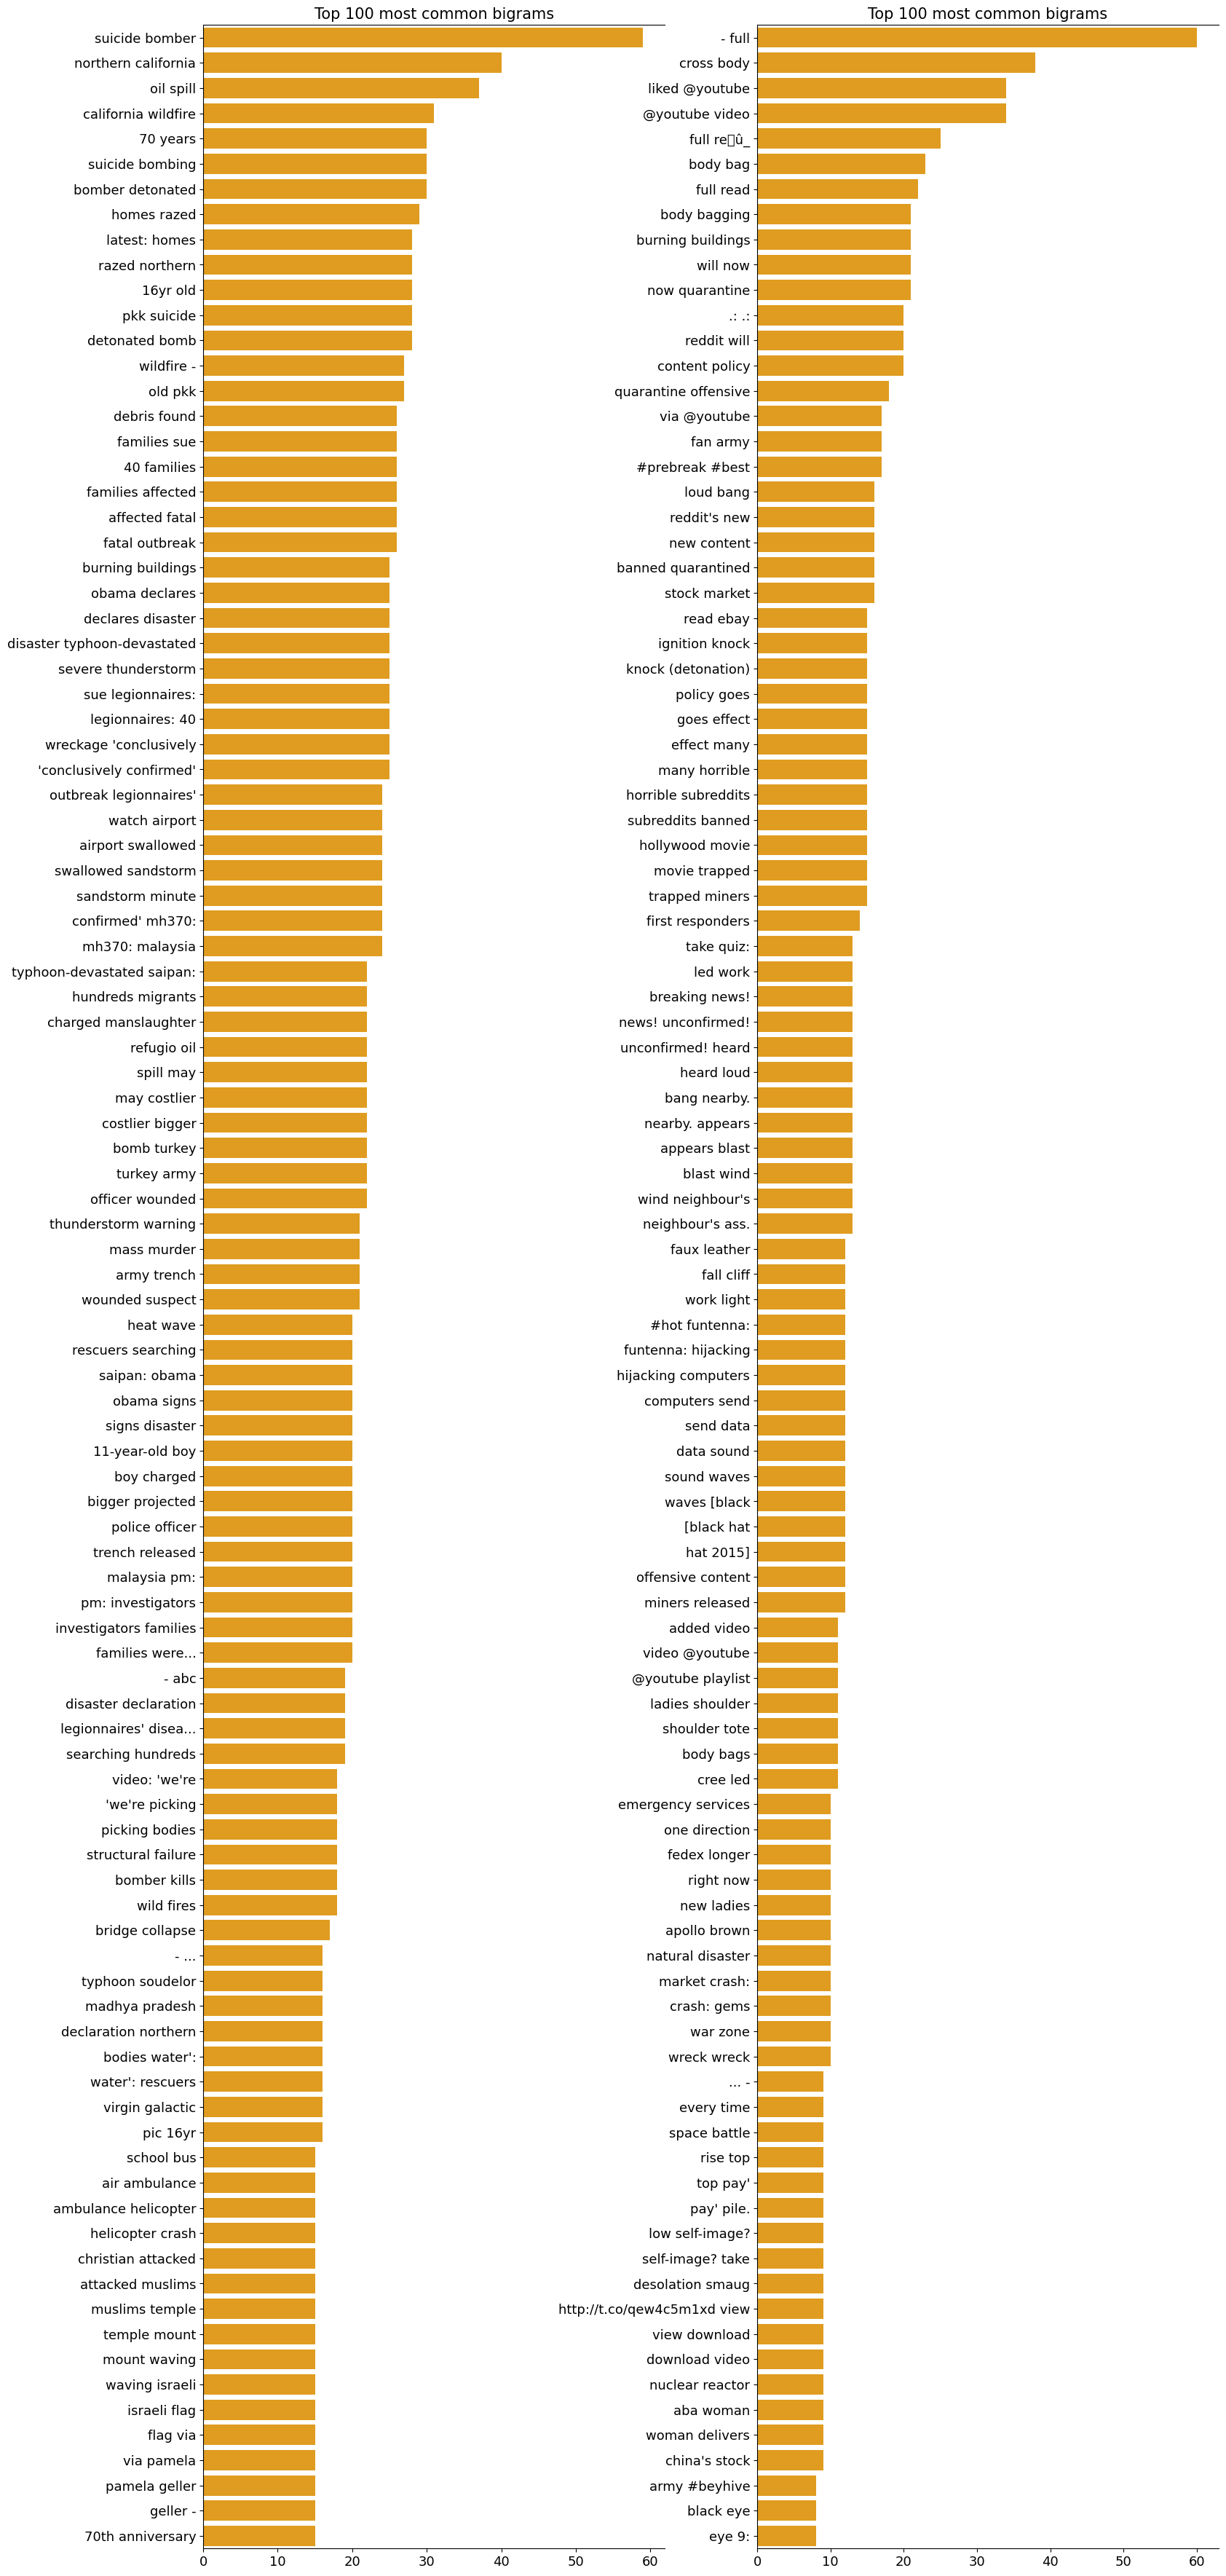

In [ ]:
df_disaster_bigrams, df_nondisaster_bigrams = count_ngrams(df_train, n_gram=2)
plot_top_ngrams(df_disaster_bigrams, df_nondisaster_bigrams, N, 'bigrams', 'orange')

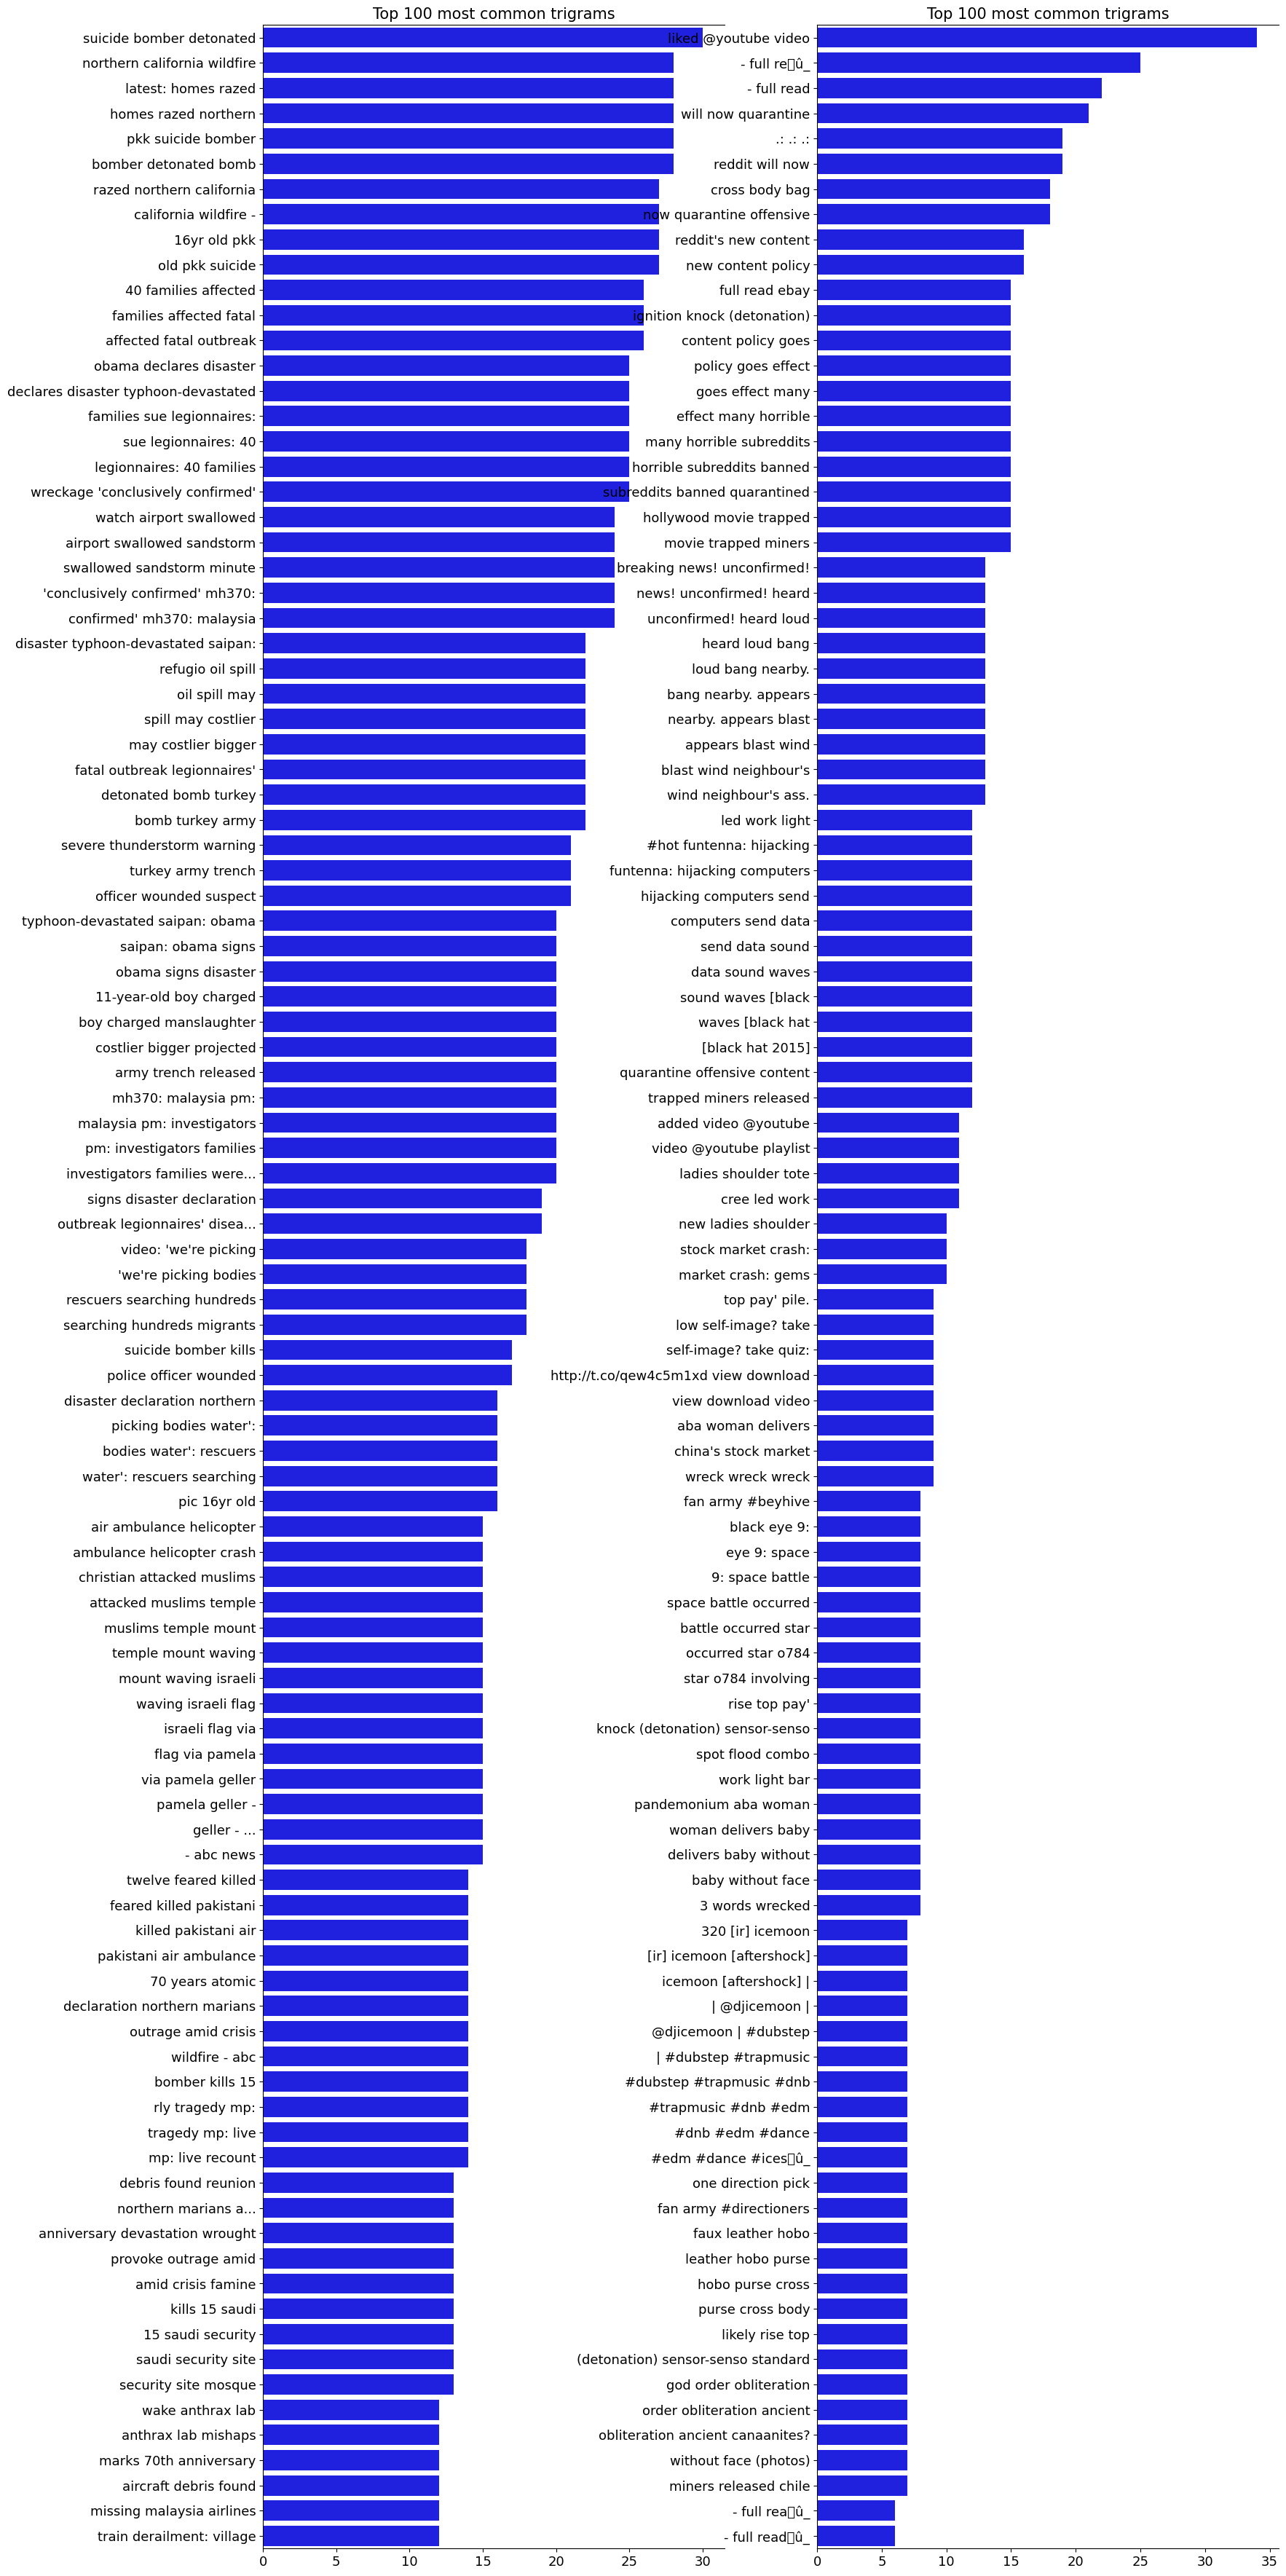

In [ ]:
df_disaster_trigrams, df_nondisaster_trigrams = count_ngrams(df_train, n_gram=3)
plot_top_ngrams(df_disaster_trigrams, df_nondisaster_trigrams, N, 'trigrams', 'blue')


The absence of bigrams common to both disaster and non-disaster tweets suggests that the context is clearer in bigrams. The most common bigrams in disaster tweets provide more information about the disasters than unigrams, but punctuation must be removed from the words before analysis. The most common bigrams in non-disaster tweets are mostly about Reddit or YouTube and contain a lot of punctuation, which must also be removed from the words before analysis.




## 1.4. Data Cleaning

Tweets require significant cleaning, but it is inefficient to clean every tweet individually, as this would be too time-consuming. Therefore, a general cleaning approach must be implemented.

The most common type of word that requires cleaning in OOV (out-of-vocabulary) words is words with punctuation at the beginning or end. These words do not have embeddings because of the trailing punctuation. The following punctuation marks are separated from words:
```
#, @, !, ?, +, &, -, $, =, <, >, |, {, }, ^, ', (, ), [, ], *, %, ..., ', ., :, ;
```
- Special characters attached to words are removed completely.

- Punctuations are removed.

- Contractions are expanded.

- URLs are removed.

Finally, hashtags and usernames contain a lot of information about the context, but they are written without spaces between words, so they do not have embeddings. Informative usernames and hashtags should be expanded, but there are too many of them. I expanded as many as I could, but it takes too much time to run the `clean()` function after adding those replace calls.

In [ ]:
from urllib.parse import urlparse

def clean(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'([#,@!?\+&\-$=<>|{}^\'\(\)\[\]\*%.:\;])', r'\1 ', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    cleaned_tweet = tweet.strip()
    return cleaned_tweet

df_train['text_cleaned'] = df_train['text'].apply(lambda s: clean(s))
df_test['text_cleaned'] = df_test['text'].apply(lambda s: clean(s))


## 1.5. Construct Model's Input

#### Regarding the features we analyzed above, prepare the model's input text data for each row of the dataframes.


In [ ]:
# Exercise 4
def construct_model_input(row):
    return f"{row['text_cleaned']} \
            {row['word_count']} \
            {row['unique_word_count']} \
            {row['stop_word_count']} \
            {row['url_count']} \
            {row['mean_word_length']} \
            {row['char_count']} \
            {row['punctuation_count']} \
            {row['hashtag_count']} \
            {row['mention_count']}"

df_train['model_input'] = df_train.apply(construct_model_input, axis=1)
df_test['model_input'] = df_test.apply(construct_model_input, axis=1)


# 2. Model Selection & Configuration

This task is a classification task because we have a discrete target that must be predicted. Since there is a slight class imbalance, <u>accuracy would be biased</u>. Therefore, we choose **Mean harmonic F1-score** as our main metric for evaluating our model's performance.

For the <u>loss function</u>, we must use **Cross Entropy Loss** for this problem. With the loss function and metric chosen, the remaining settings are narrowed down to choosing the model's structure and some hyperparameters.

Mean F-Score, which can be implemented with Macro Average F1-Score, is a useful metric for imbalanced classification tasks. However, it is not very informative without Accuracy, Precision, and Recall, especially when the classes are almost balanced and it is hard to tell which class is harder to predict.

* Accuracy measures the fraction of the total sample that is correctly identified.
* Precision measures that out of all the examples predicted as positive, how many are actually positive.
* Recall measures that out of all the actual positives, how many examples were correctly classified as positive by the model.
* F1-Score is the harmonic mean of Precision and Recall.


### 2.1. Pre-trained Bert Model: **BERTweet**

BERTweet is the first public large-scale language model pre-trained for English Tweets. BERTweet is trained based on the RoBERTa pre-training procedure. The corpus used to pre-train BERTweet consists of 850M English Tweets (16B word tokens ~ 80GB), containing 845M Tweets streamed from 01/2012 to 08/2019 and 5M Tweets related to the COVID-19 pandemic.



In [ ]:
from transformers import AutoModel, AutoTokenizer

class config:
    BERT_PATH = "vinai/bertweet-base"
    MAX_LEN = 128
    TRAIN_BATCH_SIZE = 16
    VALID_BATCH_SIZE = 8
    EPOCHS = 7
    MODEL_PATH = 'model.bin'


tokenizer = AutoTokenizer.from_pretrained(config.BERT_PATH, do_lower_case=True)
bert_model = AutoModel.from_pretrained(config.BERT_PATH)

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.91M [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [ ]:
# Exercise 5 - Complete the below code
class BERTweetClassifier(nn.Module):
    def __init__(self, bert_model):
        super(BERTweetClassifier, self).__init__()
        self.bert = bert_model

        # Add a dropout layer with p=0.3
        self.bert_drop = nn.Dropout(0.3)

        # Add a linear layer for our classification task
        self.classifier = nn.Linear(bert_model.config.hidden_size, 2)

    def forward(self, ids, mask, token_type_ids):
        # TODO: get the model's output
        bert_output = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids)

        # TODO: apply the model's dropout layer to the pooler output
        reguralized_output = self.bert_drop(bert_output.pooler_output)

        # TODO: call the classifier
        output = self.classifier(reguralized_output)
        return output


model = BERTweetClassifier(bert_model)
model.to(device)

BERTweetClassifier(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(130, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Lay

### 2.2. Prepare Dataset:

Input text is tokenized using our BERT's tokenizer.

In [ ]:
# Exercise 6 - Tokenize the input text

import torch
from torch.utils.data import Dataset

class TweetDataset(Dataset):
    def __init__(self, tweets, targets, tokenizer, max_len):
        self.tweets = tweets
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, item):
        tweet = str(self.tweets[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'ids': encoding['input_ids'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'mask': encoding['attention_mask'].flatten(),
            'target': torch.tensor(target, dtype=torch.long)
        }

max_len = 128
train_dataset = TweetDataset(tweets=df_train['model_input'], targets=df_train['target'], tokenizer=tokenizer, max_len=max_len)
test_dataset = TweetDataset(tweets=df_test['model_input'], targets=df_test['target'], tokenizer=tokenizer, max_len=max_len)


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=config.TRAIN_BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config.VALID_BATCH_SIZE, shuffle=False)

for batch in train_loader:
    token_type_ids = batch['token_type_ids']
    ids = batch['ids']
    mask = batch['mask']
    target = batch['target']

    print(token_type_ids)
    print(ids)
    print(mask)
    print(target)
    break  # Break after the first batch for demonstration purposes


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([[    0, 15714,  6483,  ...,     1,     1,     1],
        [    0,   165,    86,  ...,     1,     1,     1],
        [    0,   487,  1060,  ...,     1,     1,     1],
        ...,
        [    0, 52795,  3198,  ...,     1,     1,     1],
        [    0,  1659,   562,  ...,     1,     1,     1],
        [    0, 20710,  1871,  ...,     1,     1,     1]])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])
tensor([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])


### 2.3. Train & Evaluate:

In [ ]:
# Exercise 7 - Complete the below code
import torch.nn.functional as F

def train_model(data_loader, model, optimizer, epoch, device, scheduler):
    model.train()
    epoch_loss = 0
    for data in tqdm(data_loader, desc=f"Epoch {epoch + 1}"):
        ids = data["ids"]
        token_type_ids = data["token_type_ids"]
        mask = data["mask"]
        targets = data["target"]

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        targets = targets.to(device)
        optimizer.zero_grad()

        # Get the model's output and calculate the loss
        predictions = model(ids, mask, token_type_ids)
        loss = nn.CrossEntropyLoss()(predictions, targets)

        loss.backward()
        optimizer.step()
        scheduler.step()

        epoch_loss += loss.item()

    epoch_loss = epoch_loss / len(data_loader)
    return epoch_loss

def evaluate(data_loader, model, device):
    all_predictions = []
    all_targets = []
    model.eval()

    with torch.no_grad():
        for data in data_loader:
            ids = data["ids"]
            token_type_ids = data["token_type_ids"]
            mask = data["mask"]
            targets = data["target"]
            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device)

            # Get the model's output
            predictions = model(ids, mask, token_type_ids)

            # Calculate the probabilities of the model's output (between 0 and 1)
            probabilities = F.softmax(predictions, dim=1)

            probabilities = probabilities.cpu().numpy().tolist()
            all_predictions.extend(probabilities)

            targets = targets.cpu().detach()
            targets = targets.numpy().tolist()
            all_targets.extend(targets)

    return all_predictions, all_targets

### 2.4. Fine-tune Model:

In [ ]:
# Exercise 8 - Define the model's optimizer and learning-rate scheduler
from transformers import AdamW, get_linear_schedule_with_warmup

learning_rate = 2e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)

num_train_steps = int(len(train_dataset) * config.EPOCHS)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=int(0.1 * num_train_steps),
    num_training_steps=num_train_steps
)


In [63]:
# Exercise 9 - Complete the code of the training loop

best_f1 = 0
val_metrics = []
print(f'Total no of epochs = {config.EPOCHS}')

for epoch in range(config.EPOCHS):
    # Train the model
    train_loss = train_model(train_loader, model, optimizer, epoch, device, scheduler)

    # Evaluate the model on the test data
    outputs, targets = evaluate(test_loader, model, device)

    # Calculate Accuracy, Precision, Recall, and F1-score metrics
    accuracy = accuracy_score(targets, np.argmax(outputs, axis=1))
    recall = recall_score(targets, np.argmax(outputs, axis=1))
    precision = precision_score(targets, np.argmax(outputs, axis=1))
    f1 = f1_score(targets, np.argmax(outputs, axis=1))

    print(f"\n epoch:{epoch} | Training Loss: {train_loss} | Validation Accuracy: {accuracy} | Recall: {recall} | Precision: {precision} | F1 Score: {f1}")

    val_metrics.append({'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1})

    if f1 > best_f1:
        # Save the best model based on the performance on f1, and update the best f1-score
        torch.save(model.state_dict(), config.MODEL_PATH)
        best_f1 = f1

Total no of epochs = 7


Epoch 1:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:0 | Training Loss: 0.6487079655923763 | Validation Accuracy: 0.816426601287159 | Recall: 0.7346647646219686 | Precision: 0.8194112967382657 | F1 Score: 0.7747273411056788


Epoch 2:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:1 | Training Loss: 0.4236371128373787 | Validation Accuracy: 0.8366533864541833 | Recall: 0.7360912981455064 | Precision: 0.8635983263598327 | F1 Score: 0.7947631882941857


Epoch 3:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:2 | Training Loss: 0.3737523492519595 | Validation Accuracy: 0.8482991112473184 | Recall: 0.7368045649072753 | Precision: 0.8912855910267472 | F1 Score: 0.8067161265130809


Epoch 4:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:3 | Training Loss: 0.3391343378970603 | Validation Accuracy: 0.8378792522218818 | Recall: 0.7938659058487875 | Precision: 0.8226164079822617 | F1 Score: 0.8079854809437387


Epoch 5:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:4 | Training Loss: 0.3078868284414546 | Validation Accuracy: 0.8348145878026356 | Recall: 0.7817403708987162 | Precision: 0.8246802106847254 | F1 Score: 0.8026363969242036


Epoch 6:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:5 | Training Loss: 0.2736029407839064 | Validation Accuracy: 0.8418633159669017 | Recall: 0.7475035663338089 | Precision: 0.8661157024793389 | F1 Score: 0.8024502297090352


Epoch 7:   0%|          | 0/476 [00:00<?, ?it/s]


 epoch:6 | Training Loss: 0.2362295607214465 | Validation Accuracy: 0.8296046582899173 | Recall: 0.7639087018544936 | Precision: 0.8263888888888888 | F1 Score: 0.7939214232765011


### 2.5 Visualize Model Performance:

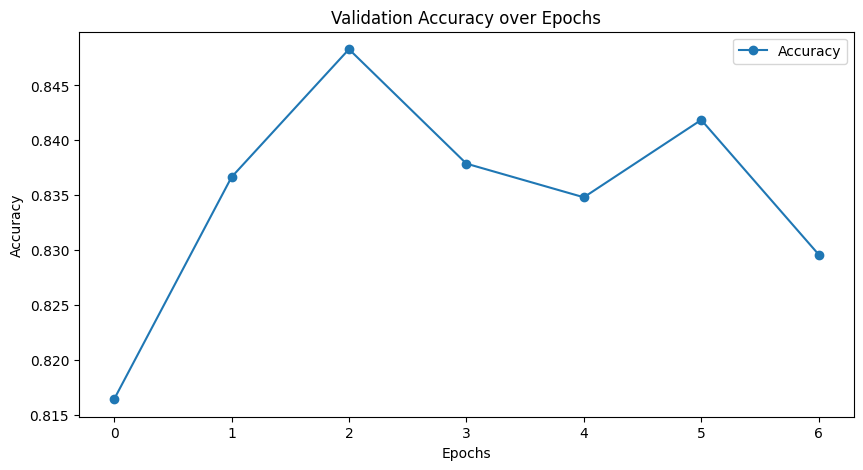

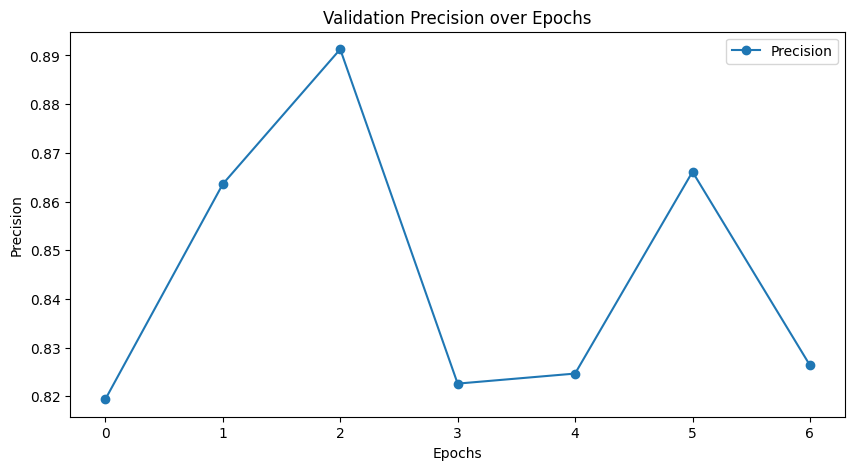

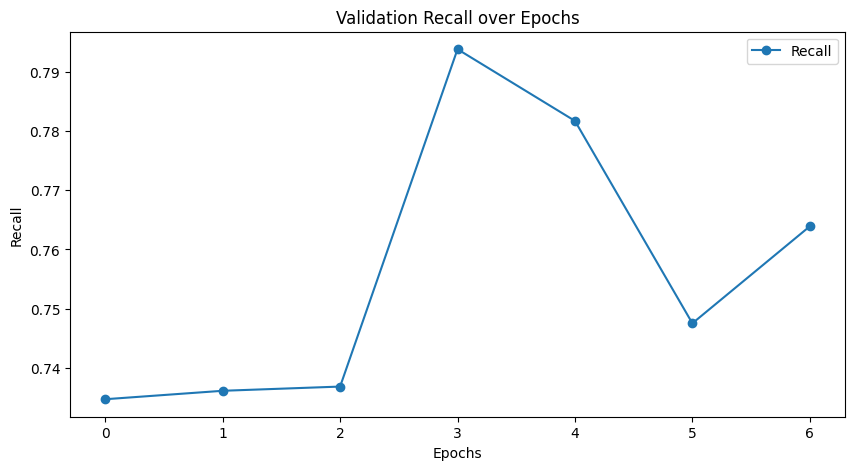

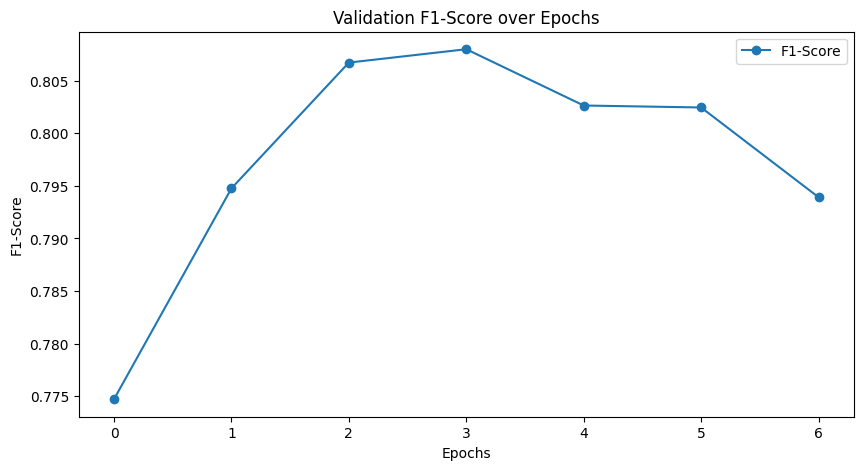

In [64]:
# Exercise 10 - Visualize training metrics (A, P, R, F1)

accuracy_values = [metric['accuracy'] for metric in val_metrics]
recall_values = [metric['recall'] for metric in val_metrics]
precision_values = [metric['precision'] for metric in val_metrics]
f1_values = [metric['f1'] for metric in val_metrics]

plt.figure(figsize=(10, 5))
plt.plot(range(config.EPOCHS), accuracy_values, label='Accuracy', marker='o')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(config.EPOCHS), precision_values, label='Precision', marker='o')
plt.title('Validation Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(config.EPOCHS), recall_values, label='Recall', marker='o')
plt.title('Validation Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(config.EPOCHS), f1_values, label='F1-Score', marker='o')
plt.title('Validation F1-Score over Epochs')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.legend()
plt.show()


### 2.6 Evaluate on Test Data:

In [65]:
# Exercise 11 - you have to reach an f1-score of at least 85% for full marks.
# TODO: load the best model
best_model = BERTweetClassifier(bert_model)
best_model.load_state_dict(torch.load(config.MODEL_PATH))
best_model.to(device)

# TODO: evaluate the model's performance on the test data and print it.
best_model.eval()
test_outputs, test_targets = evaluate(test_loader, best_model, device)

test_predictions = np.argmax(test_outputs, axis=1)
test_f1 = f1_score(test_targets, test_predictions, average='macro')

print(f'Test F1-Score: {test_f1}')

Test F1-Score: 0.8338521941976715


<div dir="rtl" style="text-align: justify">
<font face="XB Zar" size=4>
    <h1>
    <b>رتبه‌بندی نویسندگان (15 نمره)</b>
    </h1>
</font>
    <br>
<font face="XB Zar" size=3>  
    برای رتبه‌بندی نویسندگان، مفهوم ارجاع نویسندگان به یکدیگر مطرح می‌شود. زمانی که نویسنده A در مقاله خود به مقاله P که نویسنده B جزو نویسندگان آن مقاله یعنی مقاله P می‌باشد، ارجاع دهد، می‌گوییم که نویسنده A به نویسنده B ارجاع داده است. با توجه به این رابطه، می‌توان گراف ارجاعات بین نویسندگان را ایجاد و سپس با استفاده از الگوریتم HITS
نویسندگان را رتبه‌بندی کرد. برای رتبه‌بندی نیاز است تا از شاخص‌های hub و authority استفاده کنیم.


</font>
</div>

In [83]:
import networkx as nx

def hits_algorithm(papers, n):
    """
        Implementing the HITS algorithm to score authors based on their papers and co-authors.

        Parameters
        ---------------------------------------------------------------------------------------------------
        papers: A list of paper dictionaries with the following keys:
                "id": A unique ID for the paper
                "title": The title of the paper
                "abstract": The abstract of the paper
                "date": The year in which the paper was published
                "authors": A list of the names of the authors of the paper
                "related_topics": A list of IDs for related topics (optional)
                "citation_count": The number of times the paper has been cited (optional)
                "reference_count": The number of references in the paper (optional)
                "references": A list of IDs for papers that are cited in the paper (optional)
        n: An integer representing the number of top authors to return.

        Returns
        ---------------------------------------------------------------------------------------------------
        List
        list of the top n authors based on their hub scores.
    """
    # Create a graph of authors and papers (all of the authors and papers represented as nodes, and all of the authors who wrote each paper connected to the corresponding paper node by an edge)
    G = nx.DiGraph()

    for paper in papers:
        authors = paper.get("authors", [])
        if len(authors) > 1:
            G.add_nodes_from(authors)
            for author1 in authors:
                for author2 in authors:
                    if author1 != author2:
                        G.add_edge(author1, paper["id"], weight=1)
                        G.add_edge(paper["id"], author2, weight=1)

    # Run the HITS algorithm
    hubs, authorities = nx.hits(G, max_iter=100)

    # Create a list of top n authors based on their hub scores
    top_authors = sorted(hubs.keys(), key=lambda author: hubs[author], reverse=True)[:n]
    return top_authors


# call the hit_algorithm function
with open('crawled_paper.txt', 'r') as f:
  papers = json.loads(f.read())
  top_authors = hits_algorithm(papers, 2)

  # print the top authors
  print(top_authors)


['M. Kristan', 'Jiri Matas']
